Manim Concepts Cheatsheet: Sine Curve from Unit Circle

Scene Types:
- Scene: Basic 2D animation scene.
- ThreeDScene: 3D animations (not used here, but relevant for curves on 3D surfaces).

Core Mobjects:
- Dot: Represents a point in space.
- Line: Connects two points.
- Circle: Draws circles with a given radius.
- VGroup: Groups multiple Mobjects together for collective manipulation.
- MathTex: Renders LaTeX math formulas as Mobjects.

Motion & Animation:
- Updaters: Functions attached to Mobjects to update them every frame (e.g., dot.add_updater(go_around_circle)).
- always_redraw(): Keeps a Mobject dynamically updated according to a function.
- wait(): Pauses scene for a set duration.

Coordinate & Geometry Concepts:
- Cartesian Coordinates: Manual axes creation with Line.
- Unit Circle Parametrization: Use circle.point_from_proportion(t) to map t ∈ [0,1] to a point on the circle.
- Sine Mapping: Map the vertical position of the dot (y) to a curve along the X-axis.

Curve Construction:
- Incremental Drawing: Build curves by adding small Line segments between successive points.
- Dynamic Tracing: Update the curve in real-time as the dot moves.

Animation Pipeline:
1. Draw axes (Line, MathTex).
2. Draw circle (Circle).
3. Add moving dot (Dot) with updater.
4. Connect dot to axes or curve (Line + always_redraw).
5. Trace the sine curve dynamically (VGroup + incremental Line addition).

Key Concepts Illustrated:
- Relationship between circle and sine curve: The vertical position of a dot on a circle maps directly to the sine wave.
- Real-time linkage: Use updaters and always_redraw to connect motion in one object to another.
- Parametric animation: Time-based updates drive continuous motion.


## Preview:

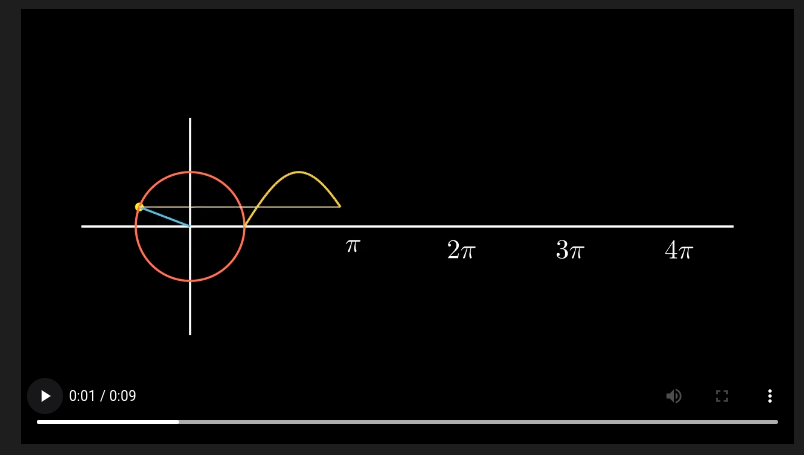

In [1]:
from manim import *

class SineCurveUnitCircle(Scene):
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex(r"\pi"), MathTex(r"2 \pi"),
            MathTex(r"3 \pi"), MathTex(r"4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)

%manim -qm -v WARNING SineCurveUnitCircle

Manim Community v0.19.0